# Assignment 1 - London Crime Dataset

### Dataset Overview
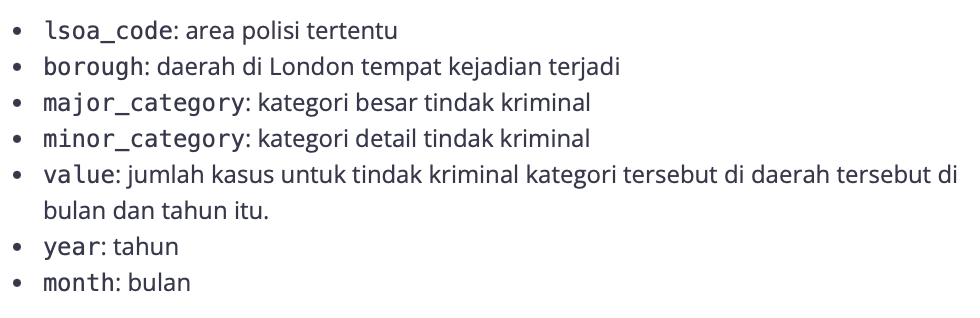

#### Pertanyaan yg ingin dijawab
1. perubahan jumlahn kasus dari 2011 - 2016 ?
2. apa tindak kriminal yang paling sering terjadi per daerah di 2016


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('assignment1/london_crime_by_lsoa.csv')
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


<Figure size 1200x800 with 0 Axes>

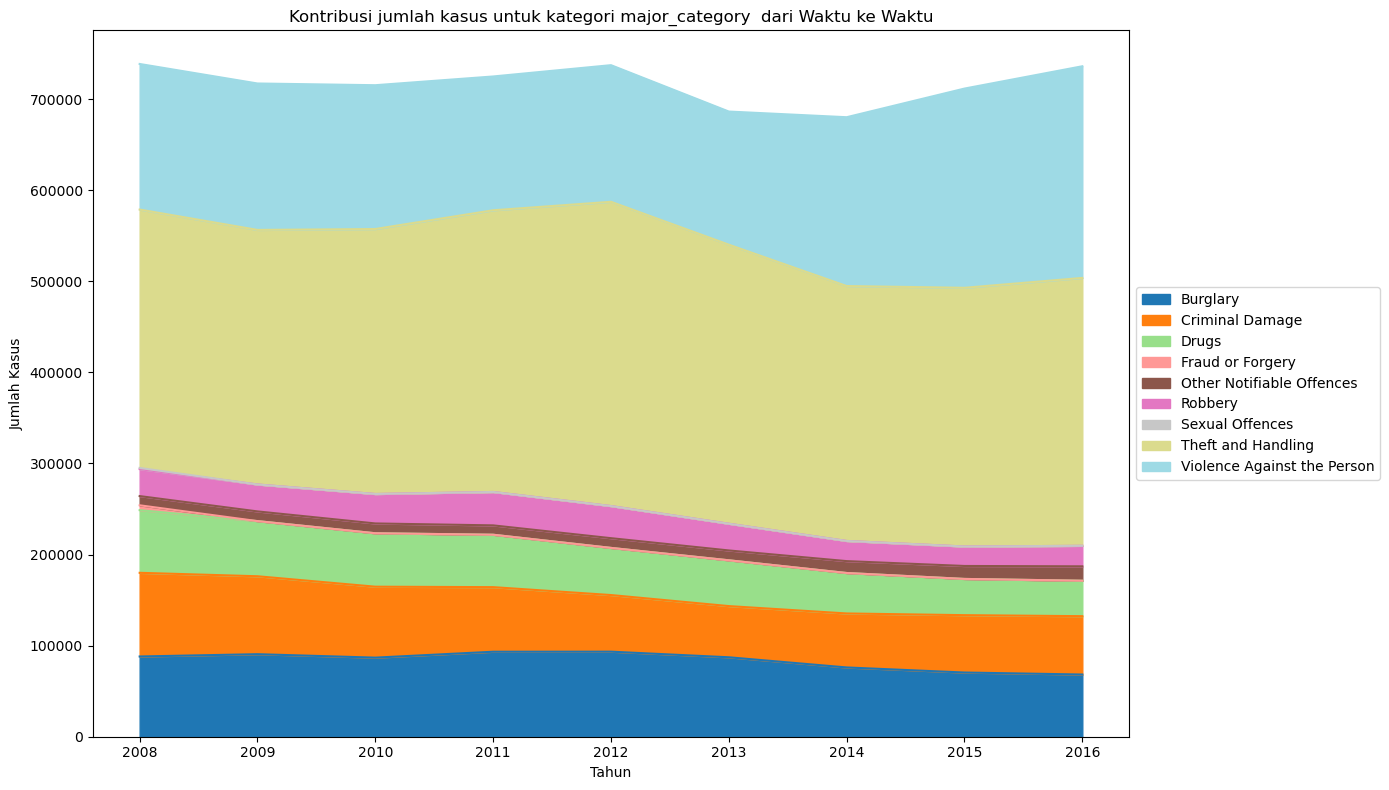

In [10]:
#area plot
#Bagaimana perubahan jumlah kasus untuk kategori kmajor_category selama bertahun-tahun?

# total value major_category per tahun
major_category = df.groupby(['major_category', 'year'])['value'].sum().reset_index()

#dibuat stacked
major_category_pivot = major_category.pivot(index='year', columns='major_category', values='value').fillna(0)

plt.figure(figsize=(12, 8))
#buat plot nya
major_category_pivot.plot(kind='area', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Kontribusi jumlah kasus untuk kategori major_category  dari Waktu ke Waktu')
plt.ylabel('Jumlah Kasus')
plt.xlabel('Tahun')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.show()

ternyata paling tinggi adalah "Violence Againste teh Person" & "Theft and Handling" sangat mendominasi kriminalitas di London. Cukup tinggi dibandingkan dengan kasus yang lain.

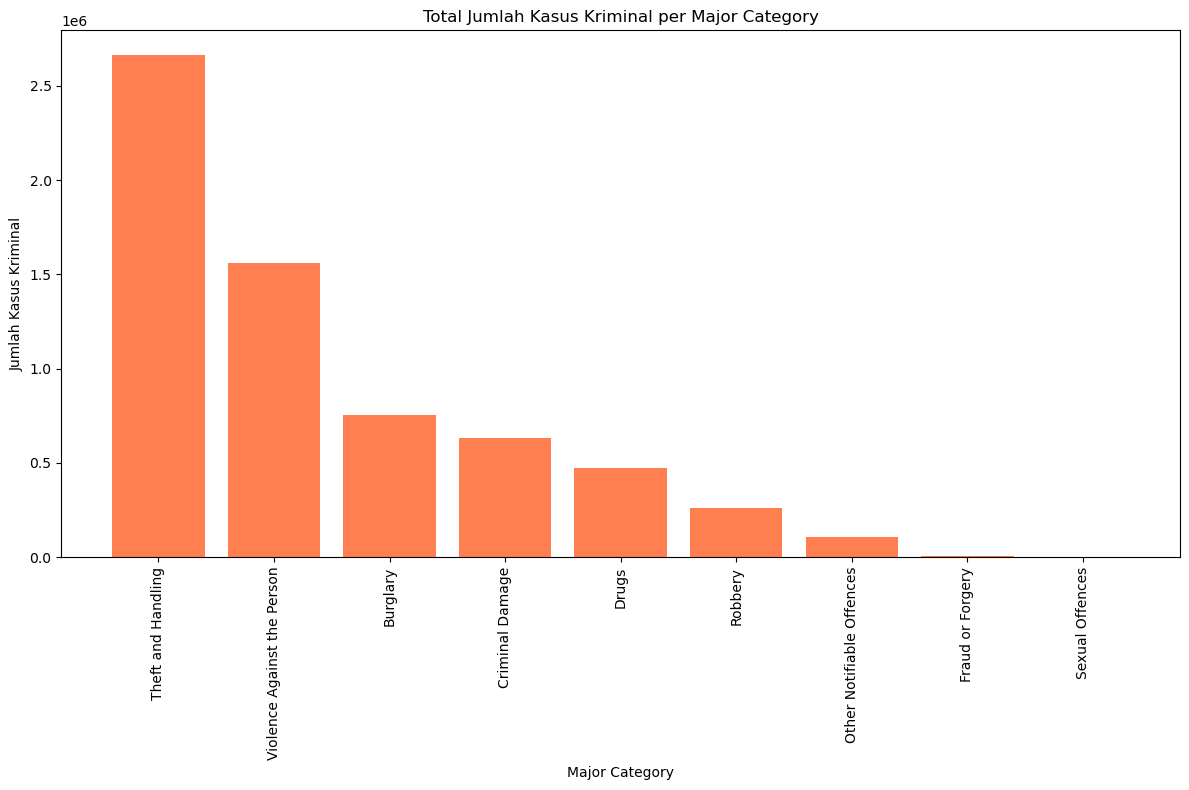

In [15]:
# Major_Category apa yg paling tinggi yg pernah terjadi di London dari periode 2008 - 2016 ?

category_total = df.groupby('major_category')['value'].sum().reset_index()

category_total = category_total.sort_values(by='value', ascending=False)

# Plot a bar chart
plt.figure(figsize=(12, 8))
plt.bar(category_total['major_category'], category_total['value'], color='coral')
plt.title('Total Jumlah Kasus Kriminal per Major Category')
plt.ylabel('Jumlah Kasus Kriminal')
plt.xlabel('Major Category')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()